In [33]:
import pandas as pd
import numpy as np
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_score, recall_score, precision_recall_curve,f1_score, fbeta_score
from sklearn.metrics import roc_auc_score, roc_curve
import seaborn as sns

In [34]:
df = pd.read_csv("/Users/juBmam/Desktop/house-votes-84.data", names= ['Party', 'Handicapped Infants', 'Water Project Cost Sharing', 'Adoption of the Budget Resolution', 'Physician Fee Freeze', 'El Salvador Aid', 'Religious Groups in Schools', 'Anti Satellite Test Ban', 'Aid to Nicaraguan Contras', 'MX Missile', 'Immigration', 'Synfuels Corporation Cutback', 'Education spending', 'Superfund Right to Use', 'Crime', 'Duty Free Exports', 'Export Administration Act S. Africa'])

In [35]:
X = df.iloc[:,1:]
y = df['Party']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.3, random_state= 4444)

def yesno(input):
    if input == 'y' or input == 'republican':
        return 1
    elif input == 'n' or input == 'democrat':
        return 0
    else:
        return input
    
for i in df.columns:
    df[i] = df[i].apply(yesno)
    
for i in df.columns[1:]:
    values = sorted(df[i].value_counts(), reverse = True)
    fraction = values[1] / 435
    fraction = round(fraction, 3)
    df[i] = df[i].replace('?', fraction)
    
X = df.iloc[:,1:]
y = df['Party']
KNN_parameters = {'n_neighbors': np.arange(1,21,1)}
grid_search = GridSearchCV(estimator=KNeighborsClassifier(), param_grid = KNN_parameters, cv=10, scoring='neg_mean_squared_error', verbose = 0, n_jobs = -1)
grid_search.fit(X, y)
print("Outcomes from the Best KNN Regression Model:")
print("Minimum Average Test MSE:", grid_search.best_score_.round(3))
print("The optimal n:", grid_search.best_params_['n_neighbors'])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, random_state= 10)
knn = KNeighborsClassifier(n_neighbors = 6)
knn.fit(X_train, y_train)
predict = knn.predict(X_test)
accuracy = metrics.accuracy_score(y_test, predict)
accuracy



Outcomes from the Best KNN Regression Model:
Minimum Average Test MSE: -0.055
The optimal n: 6


0.9425287356321839

In [36]:
y_predict = knn.predict(X_test)
print("Default threshold:")
print("Precision: {:6.4f},   Recall: {:6.4f}".format(precision_score(y_test, y_predict), 
                                                     recall_score(y_test, y_predict)))
print(f1_score(y_test, y_predict))

Default threshold:
Precision: 0.9000,   Recall: 0.9730
0.935064935064935


ROC AUC score =  0.9716216216216216


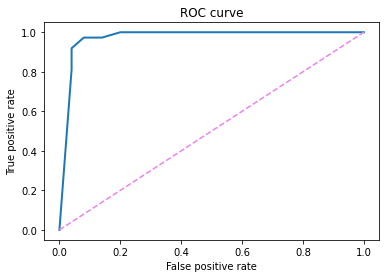

In [38]:
fpr, tpr, thresholds = roc_curve(y_test, knn.predict_proba(X_test)[:,1])

plt.plot(fpr, tpr,lw=2)
plt.plot([0,1],[0,1],c='violet',ls='--')
plt.xlim([-0.05,1.05])
plt.ylim([-0.05,1.05])


plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve');
print("ROC AUC score = ", roc_auc_score(y_test, knn.predict_proba(X_test)[:,1]))